In [1]:
#Importing all the neccesary libraries:
import math
import librosa
import numpy as np
import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.fftpack as fftp
from scipy.fft import fft, fftfreq
from sympy import symbols, diff, pretty_print, factorial, lambdify, sympify

#Taylor series📉

Function: $\cos((4x)^3)$

In [ ]:
def generate_expansion(func, terms):
    """
    param func : str
    param terms : int
    return: sympy.core.add.Add (sympy expression)
    >>> generate_expansion('sin(x)', 5)
    -x**3/6 + x
    >>> generate_expansion('cos(x)', 7
    -x**6/720 + x**4/24 - x**2/2 + 1
    """
    if not(isinstance(func, str) and isinstance(terms, int)):
      return 'Incorrect input!'
    function = sympify(func)
    x = symbols('x')
    result = function.subs(x, 0)
    for i in range(1, terms):
      result += (diff(func, x, i)).subs(x, 0) * (x**i)/(factorial(i))
    return result

Let`s check, what the series with terms=30 will look like.

In [ ]:
series = generate_expansion('cos(x)', 30)
print(series)

x**28/304888344611713860501504000000 - x**26/403291461126605635584000000 + x**24/620448401733239439360000 - x**22/1124000727777607680000 + x**20/2432902008176640000 - x**18/6402373705728000 + x**16/20922789888000 - x**14/87178291200 + x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1


Now let`s visualize the results and compare them with built-in graphic📉

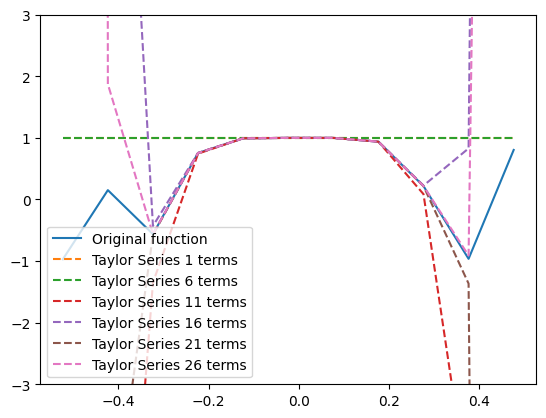

In [ ]:
#Taking angles around zero:
angles = np.arange(-np.pi / 6, np.pi / 6, 0.1)
#Counting original function:
original = np.cos((4 * angles) ** 3)

fig, ax = plt.subplots()
ax.plot(angles, original)

#Counting Maclauren series from 1 to 30 terms with step 5:
for i in range(1, 30, 5):
    x = symbols('x')
    taylor = [generate_expansion('cos((4*x) ** 3)', i).subs(x, angle) for angle in angles]
    ax.plot(angles, taylor, linestyle="--")
ax.set_ylim([-3, 3])

#Setting up legend:
legend_lst = ['Original function']
for i in range(1, 30, 5):
    legend_lst.append(f'Taylor Series {i} terms')
ax.legend(legend_lst, loc=3)
plt.show()



Now I made the short video (only 1 second) that shows the visualization of Taylor series on different number of terms (from 1 to 100)**📊**

In [ ]:
from moviepy.editor import VideoFileClip

video = VideoFileClip("/content/drive/MyDrive/ezgif-2-d4fcab66a2.mp4")
video.ipython_display(width=400)



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Now we can see that the more terms we have, the more precisely an approximation (only aroud point x=0) of Maclauren (or Taylor in general case) series we get. However, as my function take param terms as expected number of terms, but some of them are equal 0, the true amount of terms is less.


#Fourier transform🔊

My audio: 'humpback'🐋


In [ ]:
#Loading the audio:
audio_path = librosa.example('humpback')
trumpet_sample, sampling_rate = librosa.load(audio_path)

Searching all the neccessary values:

In [ ]:
size = trumpet_sample.size
time = np.arange(size) / sampling_rate
#Frequency resolution:
dt = 1 / sampling_rate

Plotting the audio wave diagram:

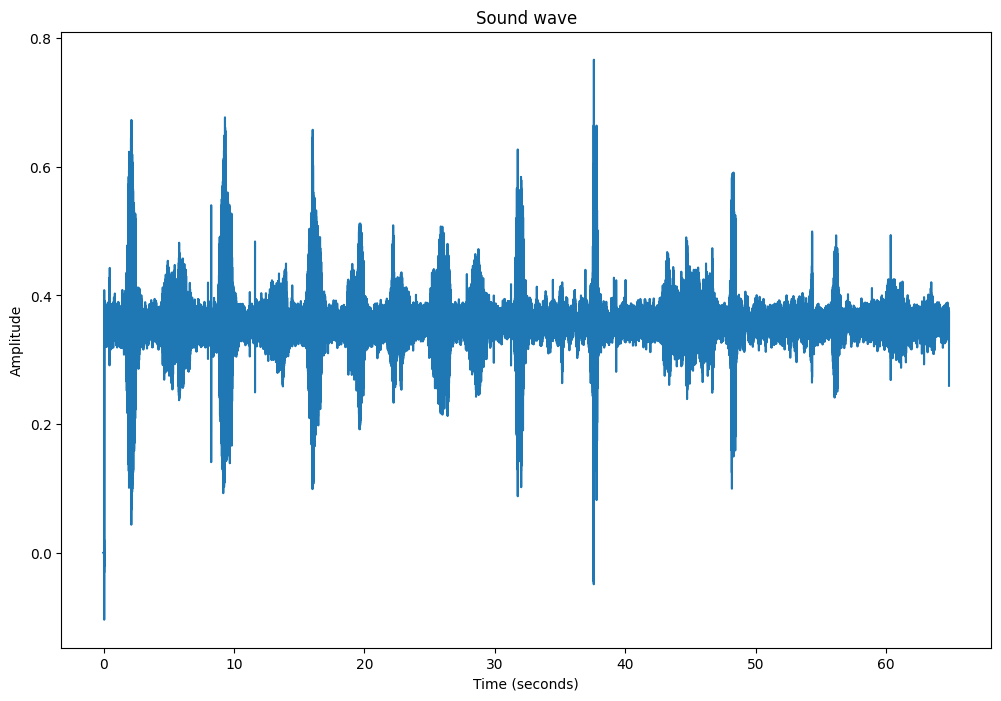

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(time, trumpet_sample)
plt.title('Sound wave')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

On this diagram all the waves are chaotic, so we wiil do FFT on this audio.


Founding and plotting the FFT of the audio:

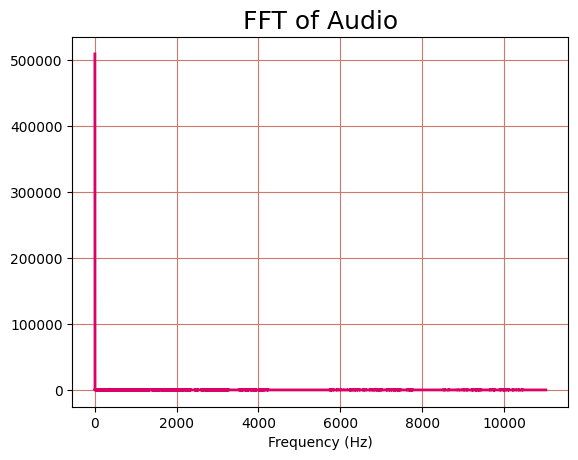

In [ ]:
#Measurement duration:
D = librosa.stft(trumpet_sample)
S = np.abs(D)
N = len(trumpet_sample)
freq = np.fft.fftfreq(N, dt)[:N//2]
y_fft = np.fft.fft(trumpet_sample)[:N//2]
plt.plot(freq, np.abs(y_fft), color='#d90368', linewidth=2)
plt.title("FFT of Audio", fontsize=18)
plt.xlabel("Frequency (Hz)")
plt.grid(color='#ce796b')
plt.show()

This graphic of FFT shows us requency domain representation. In general, the FFT plot is a powerful tool to visualize and analyze the frequency content of a signal, and it is widely used in many fields including audio processing, signal processing, and image processing.






Counting and plotting the spectogram of the audio:

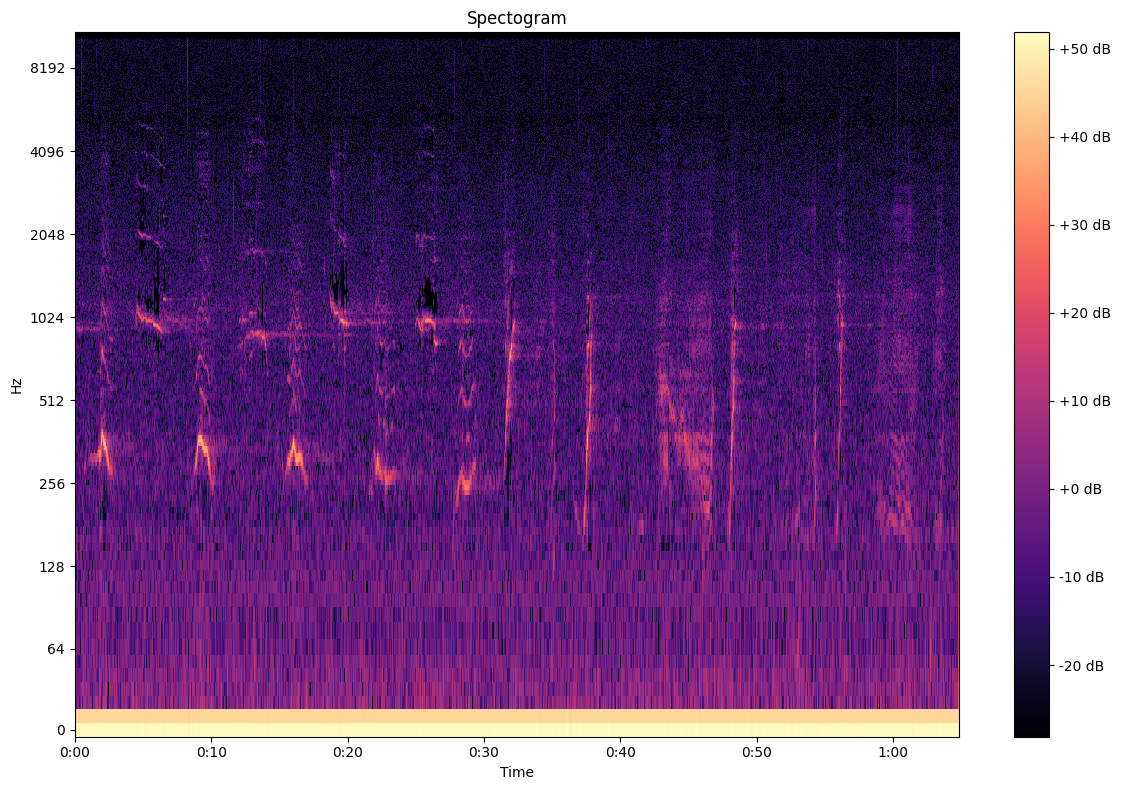

In [ ]:
spectrogram = librosa.stft(trumpet_sample)

plt.figure(figsize=(12, 8))
librosa.display.specshow(librosa.amplitude_to_db(abs(spectrogram)), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectogram')
plt.tight_layout()
plt.show()

Overall, this code generates a visual representation of the frequency content of the trumpet sample over time, where the x-axis shows time, the y-axis shows frequency on a logarithmic scale, and the color represents the amplitude of the signal in dB.

Thank you for viewing❤️